In [1]:
# --- 核心库导入 ---
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import os
print("所有库导入成功！")


# --- 全局颜色配置 (Global Color Configuration) ---
print("正在配置全局颜色...")

# 公司方颜色
corp_faction_colors = {
    'haas-bioroid': '#8A2BE2',       # 紫色
    'jinteki': '#DC143C',            # 红色
    'nbn': '#FFD700',                 # 黄色
    'weyland-consortium': '#006400',  # 绿色
    'neutral-corp': '#808080',      # 中立灰色
}

# 潜袭者方颜色
runner_faction_colors = {
    'anarch': '#FF4500',          # 橙红色
    'shaper': '#228B22',          # 森林绿
    'criminal': '#4169E1',        # 宝蓝色
    'neutral-runner': '#808080',  # 中立灰色
    'adam': '#A9A9A9',
    'apex': '#696969',
    'sunny-lebeau': '#00BFFF'
}


faction_colors = {**corp_faction_colors, **runner_faction_colors}

print(f"颜色配置完成！总共定义了 {len(faction_colors)} 种阵营颜色。")


# --- 其他全局可视化设置 ---
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)

print("✅ 全局设置完成！可以开始分析了。")


所有库导入成功！
正在配置全局颜色...
颜色配置完成！总共定义了 12 种阵营颜色。
✅ 全局设置完成！可以开始分析了。


In [2]:

print("\n正在从本地'data'文件夹加载数据...")

# 定义文件路径
corp_data_path = 'data/final_corp_data.csv'
runner_data_path = 'data/final_runner_data.csv'

# 检查文件是否存在，如果不存在则给出友好提示
if os.path.exists(corp_data_path) and os.path.exists(runner_data_path):
    # 使用pd.read_csv()读取数据到DataFrame
    corp_df = pd.read_csv(corp_data_path)
    runner_df = pd.read_csv(runner_data_path)
    print("✅ 公司方和潜袭者方数据加载成功！")
    
    # 打印公司方数据信息，快速检查一下是否正确
    print("\n公司方数据表格 (corp_df) 信息概览：")
    corp_df.info()
else:
    print("❌ 错误：未在'data'文件夹下找到CSV文件。请确保你的数据收集Notebook已成功运行并保存了文件。")
    # 如果文件不存在，后面的代码会出错，所以我们在这里处理一下
    corp_df = pd.DataFrame() # 创建一个空的DataFrame以避免报错
    runner_df = pd.DataFrame()




正在从本地'data'文件夹加载数据...
✅ 公司方和潜袭者方数据加载成功！

公司方数据表格 (corp_df) 信息概览：
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7069 entries, 0 to 7068
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   tournament_id  7069 non-null   int64 
 1   player         7069 non-null   object
 2   decklist_id    7069 non-null   int64 
 3   card_id        7069 non-null   int64 
 4   quantity       7069 non-null   int64 
 5   code           7069 non-null   int64 
 6   title          7069 non-null   object
 7   faction_code   7069 non-null   object
 8   side_code      7069 non-null   object
 9   type_code      7069 non-null   object
dtypes: int64(5), object(5)
memory usage: 552.4+ KB



--- 分析1: 公司阵营出场率 ---
已成功从总数据中分离出 302 套卡组的身份卡信息。
图表已成功保存到: images/corp_fraction_popularity.png


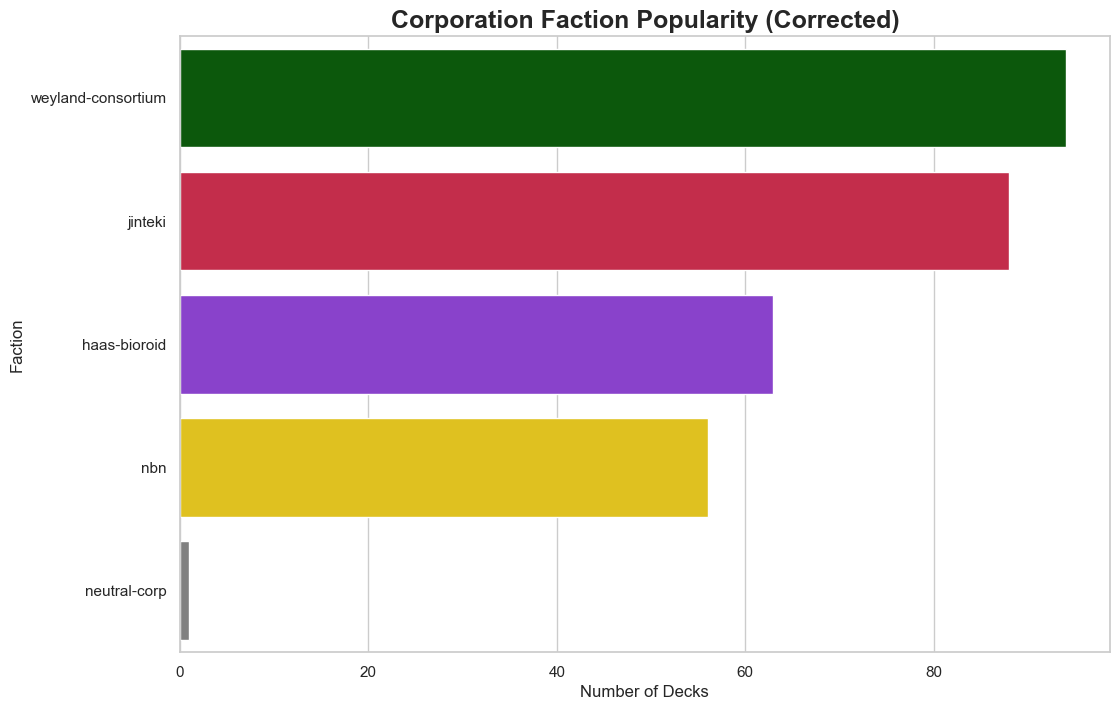

In [3]:


if not corp_df.empty:
    print("\n--- 分析1: 公司阵营出场率 ---")

    # 1. 【关键修正】从你的总数据中，只筛选出身份卡 (Identity cards)
    #    身份卡在 'type_code' 列中被标记为 'identity'
    identities_df = corp_df[corp_df['type_code'] == 'identity']
    
    # 现在，identities_df 这个表格里，每一行都精确地代表一个独立卡组的身份卡。

    print(f"已成功从总数据中分离出 {len(identities_df)} 套卡组的身份卡信息。")

    # 2. 在这个【只包含身份卡】的表格上进行可视化
    plt.figure()

    faction_plot = sns.countplot(
        data=identities_df, # <-- 使用修正后的、只包含身份卡的数据！
        y='faction_code',
        order=identities_df['faction_code'].value_counts().index, # 排序也用这个新表格的数据
        hue='faction_code',
        palette=faction_colors,
        legend=False
    )

    faction_plot.set_title('Corporation Faction Popularity (Corrected)', fontsize=18, weight='bold')
    faction_plot.set_xlabel('Number of Decks', fontsize=12)
    faction_plot.set_ylabel('Faction', fontsize=12)

    if not os.path.exists('images'):
        os.makedirs('images')
    
    #定义文件名和路径
    image_path = 'images/corp_fraction_popularity.png'
    
    #调用 savefig() 来保存
    plt.savefig(
        image_path, 
        dpi=300,               # 参数1: dpi=300, 保存为高分辨率图片，更清晰
        bbox_inches='tight'    # 参数2: bbox_inches='tight', 自动裁剪掉图片周围多余的白边
    )
    
    print(f"图表已成功保存到: {image_path}")
    
    plt.show()






--- 分析2: Top 10 公司身份出场率 (按阵营着色) ---


C:\Users\weifeng\AppData\Local\Temp\ipykernel_15264\2956960074.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  identity_plot = sns.barplot(


图表已成功保存到: images/corp_identity_popularity.png


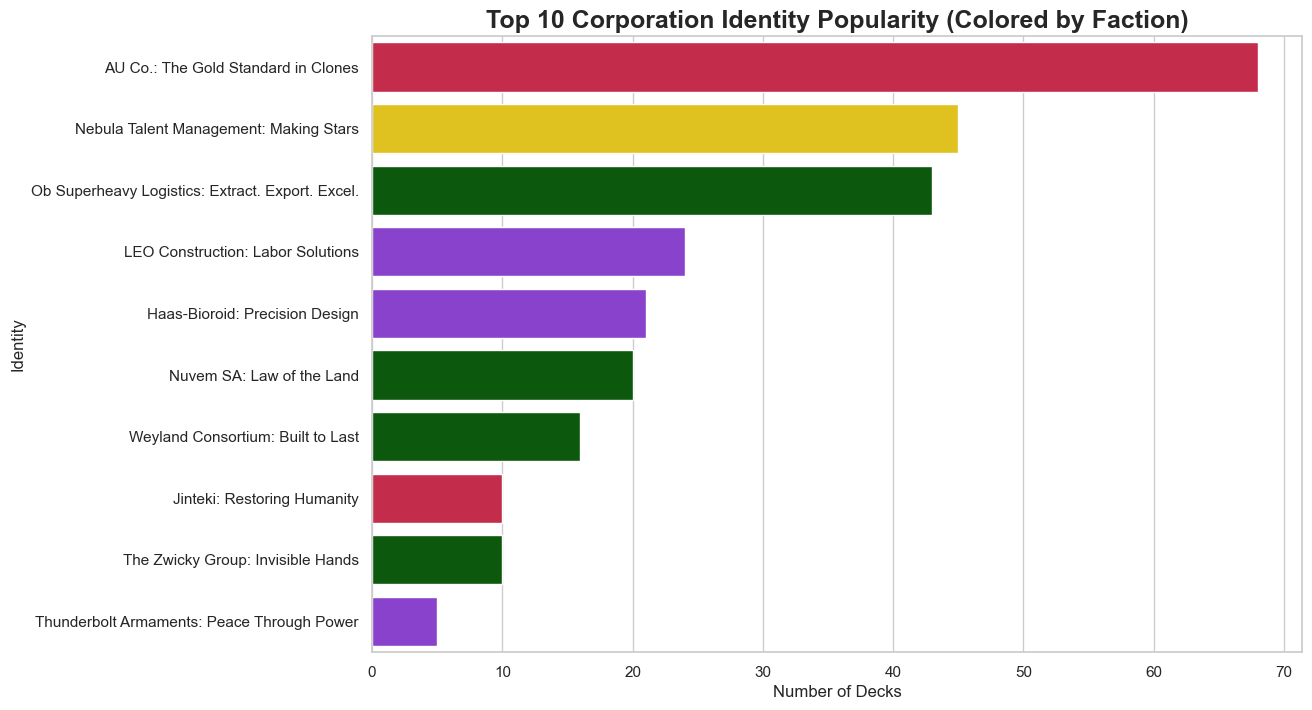

In [4]:

if not corp_df.empty:
    print("\n--- 分析2: Top 10 公司身份出场率 (按阵营着色) ---")

    # --- 步骤 1: 准备绘图所需的数据 ---

    # a. 从总数据中，只筛选出身份卡 (这步不变)
    identities_df = corp_df[corp_df['type_code'] == 'identity']

    # b. 计算出Top 10的身份 (这步不变)
    top_10_identities = identities_df['title'].value_counts().head(10)

    # --- 步骤 2: 【关键修正】创建一个【唯一索引】的查找表 ---
    
    # a. 从只包含身份卡的identities_df中，选取我们需要的两列，并使用 .drop_duplicates() 去除重复行
    map_source = identities_df[['title', 'faction_code']].drop_duplicates()
    
    # b. 现在，再用这个干净的、无重复的来源来创建查找表
    identity_to_faction_map = map_source.set_index('title')['faction_code']
    
    # c. 生成颜色列表 (这行代码现在可以正常工作了)
    custom_palette_for_ids = [
        faction_colors.get(faction, '#CCCCCC')
        for faction in top_10_identities.index.map(identity_to_faction_map)
    ]

    # --- 步骤 3: 使用自定义颜色进行绘图 (这部分代码无需改动) ---
    plt.figure()
    
    identity_plot = sns.barplot(
        x=top_10_identities.values,
        y=top_10_identities.index,
        palette=custom_palette_for_ids
    )
    
    identity_plot.set_title('Top 10 Corporation Identity Popularity (Colored by Faction)', fontsize=18, weight='bold')
    identity_plot.set_xlabel('Number of Decks', fontsize=12)
    identity_plot.set_ylabel('Identity', fontsize=12)

    if not os.path.exists('images'):
        os.makedirs('images')
    
    #定义文件名和路径
    image_path = 'images/corp_identity_popularity.png'
    
    #调用 savefig() 来保存
    plt.savefig(
        image_path, 
        dpi=300,               # 参数1: dpi=300, 保存为高分辨率图片，更清晰
        bbox_inches='tight'    # 参数2: bbox_inches='tight', 自动裁剪掉图片周围多余的白边
    )
    
    print(f"图表已成功保存到: {image_path}")
    
    plt.show()


--- 分析3: Top 20 公司卡牌使用率 (按阵营着色) ---


C:\Users\weifeng\AppData\Local\Temp\ipykernel_15264\2886495935.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  card_plot = sns.barplot(


图表已成功保存到: images/corp_card_popularity.png
图表生成成功！


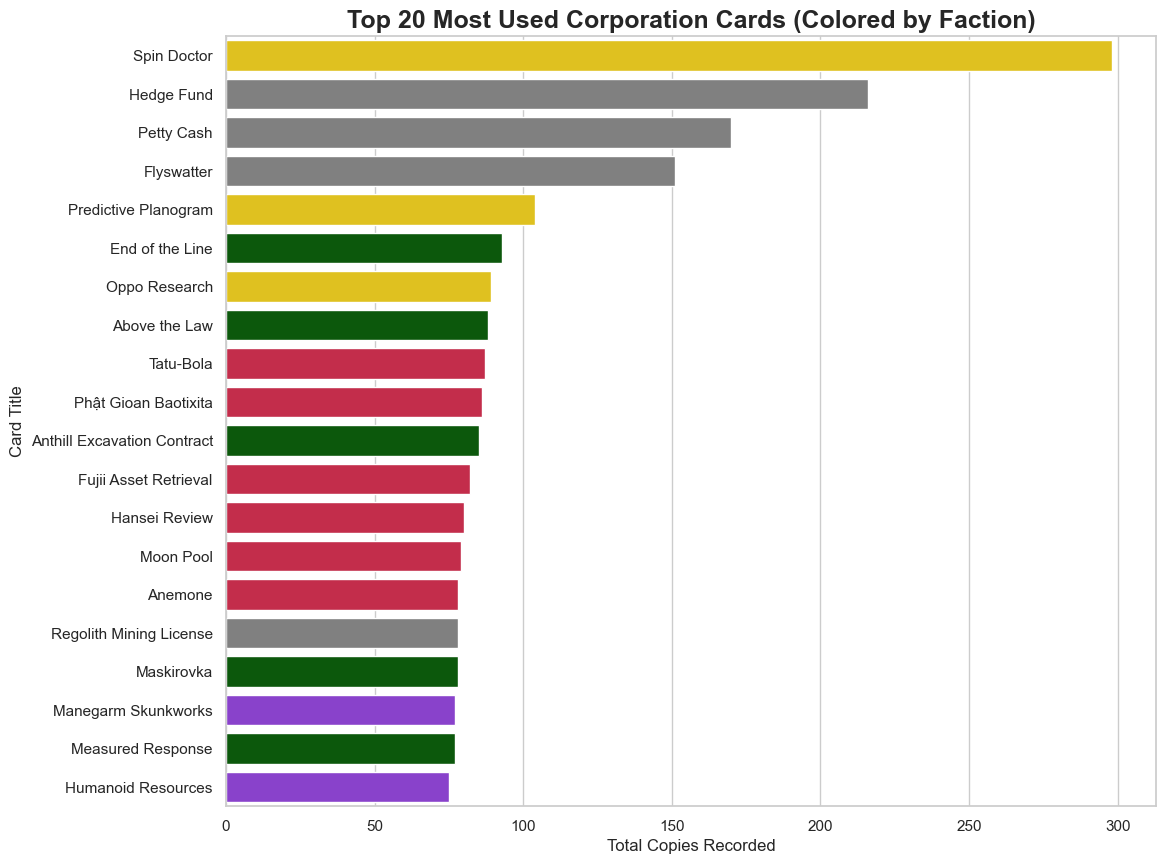

In [5]:



if not corp_df.empty:
    print("\n--- 分析3: Top 20 公司卡牌使用率 (按阵营着色) ---")



    # --- 步骤 2: 准备绘图所需的数据 ---

    # a. 计算出Top 20的卡牌 (和之前一样)
    top_20_cards = corp_df[corp_df['type_code'] != 'identity']['title'].value_counts().head(20)

    # b. 【关键】为这Top 20的卡牌，找到它们各自的阵营
    #    首先，我们创建一个从卡牌标题到阵营代码的“查找表”(mapping)
    card_to_faction_map = corp_df[['title', 'faction_code']].drop_duplicates().set_index('title')['faction_code']
    
    #    然后，我们利用这个查找表，为Top 20的卡牌标题列表，生成一个对应的【颜色列表】
    #    top_20_cards.index 就是一个包含20个卡牌标题的列表
    #    这行代码读作：对于Top 20卡牌中的每一个标题，先找到它的阵营，再根据阵营找到对应的颜色，最后把这些颜色组合成一个列表。
    custom_palette = [faction_colors.get(faction, '#CCCCCC') for faction in top_20_cards.index.map(card_to_faction_map)]


    # --- 步骤 3: 使用自定义颜色进行绘图 ---
    plt.figure(figsize=(12, 10)) # 我们可以把图调得高一点，方便看清标签
    
    card_plot = sns.barplot(
        x=top_20_cards.values,
        y=top_20_cards.index,
        palette=custom_palette  # <-- 魔法在这里！我们传入了自己生成的颜色列表
    )
    
    card_plot.set_title('Top 20 Most Used Corporation Cards (Colored by Faction)', fontsize=18, weight='bold')
    card_plot.set_xlabel('Total Copies Recorded', fontsize=12)
    card_plot.set_ylabel('Card Title', fontsize=12)

    if not os.path.exists('images'):
        os.makedirs('images')
    
    #定义文件名和路径
    image_path = 'images/corp_card_popularity.png'
    
    #调用 savefig() 来保存
    plt.savefig(
        image_path, 
        dpi=300,               # 参数1: dpi=300, 保存为高分辨率图片，更清晰
        bbox_inches='tight'    # 参数2: bbox_inches='tight', 自动裁剪掉图片周围多余的白边
    )
    
    print(f"图表已成功保存到: {image_path}")
    
    print("图表生成成功！")
    plt.show()


--- 分析1: 潜袭者阵营出场率 ---
已成功从总数据中分离出 303 套卡组的身份卡信息。
图表已成功保存到: images/runner_fraction_popularity.png


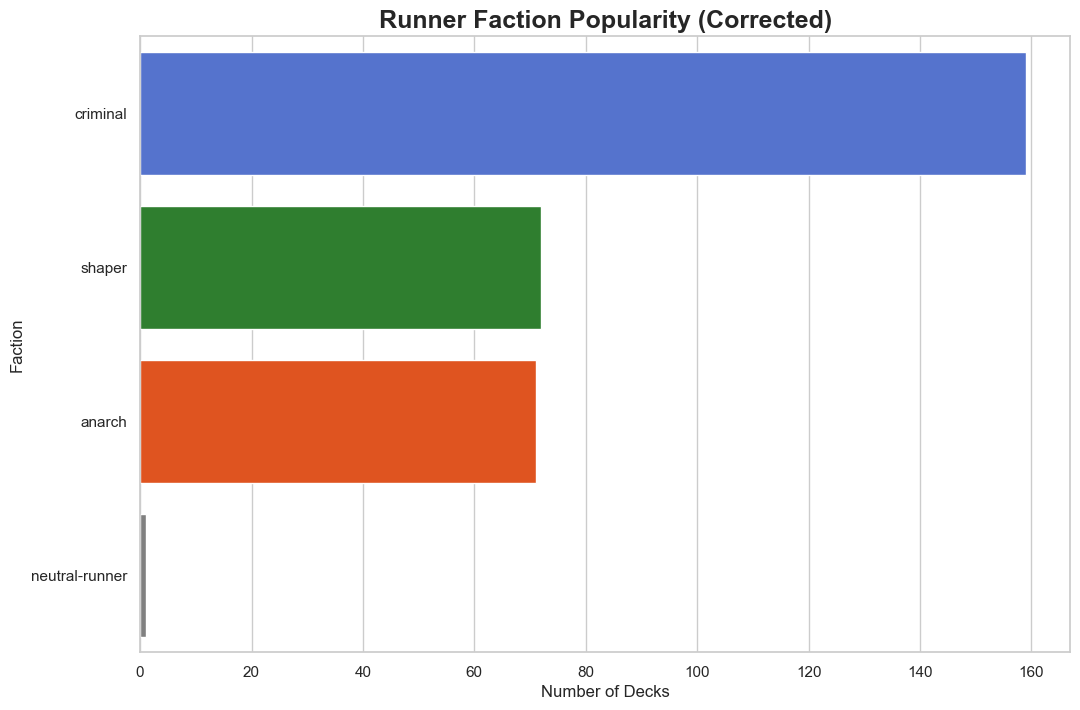

In [6]:
if not runner_df.empty:
    print("\n--- 分析1: 潜袭者阵营出场率 ---")


    identities_df = runner_df[runner_df['type_code'] == 'identity']
    
    # 现在，identities_df 这个表格里，每一行都精确地代表一个独立卡组的身份卡。

    print(f"已成功从总数据中分离出 {len(identities_df)} 套卡组的身份卡信息。")

    # 2. 在这个【只包含身份卡】的表格上进行可视化
    plt.figure()

    faction_plot = sns.countplot(
        data=identities_df, # <-- 使用修正后的、只包含身份卡的数据！
        y='faction_code',
        order=identities_df['faction_code'].value_counts().index, # 排序也用这个新表格的数据
        hue='faction_code',
        palette=faction_colors,
        legend=False
    )

    faction_plot.set_title('Runner Faction Popularity (Corrected)', fontsize=18, weight='bold')
    faction_plot.set_xlabel('Number of Decks', fontsize=12)
    faction_plot.set_ylabel('Faction', fontsize=12)

    if not os.path.exists('images'):
        os.makedirs('images')
    
    #定义文件名和路径
    image_path = 'images/runner_fraction_popularity.png'
    
    #调用 savefig() 来保存
    plt.savefig(
        image_path, 
        dpi=300,               # 参数1: dpi=300, 保存为高分辨率图片，更清晰
        bbox_inches='tight'    # 参数2: bbox_inches='tight', 自动裁剪掉图片周围多余的白边
    )
    
    print(f"图表已成功保存到: {image_path}")

    plt.show()



--- 分析2: Top 10 潜袭者身份出场率 (按阵营着色) ---


C:\Users\weifeng\AppData\Local\Temp\ipykernel_15264\1016243662.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  identity_plot = sns.barplot(


图表已成功保存到: images/runner_identity_popularity.png


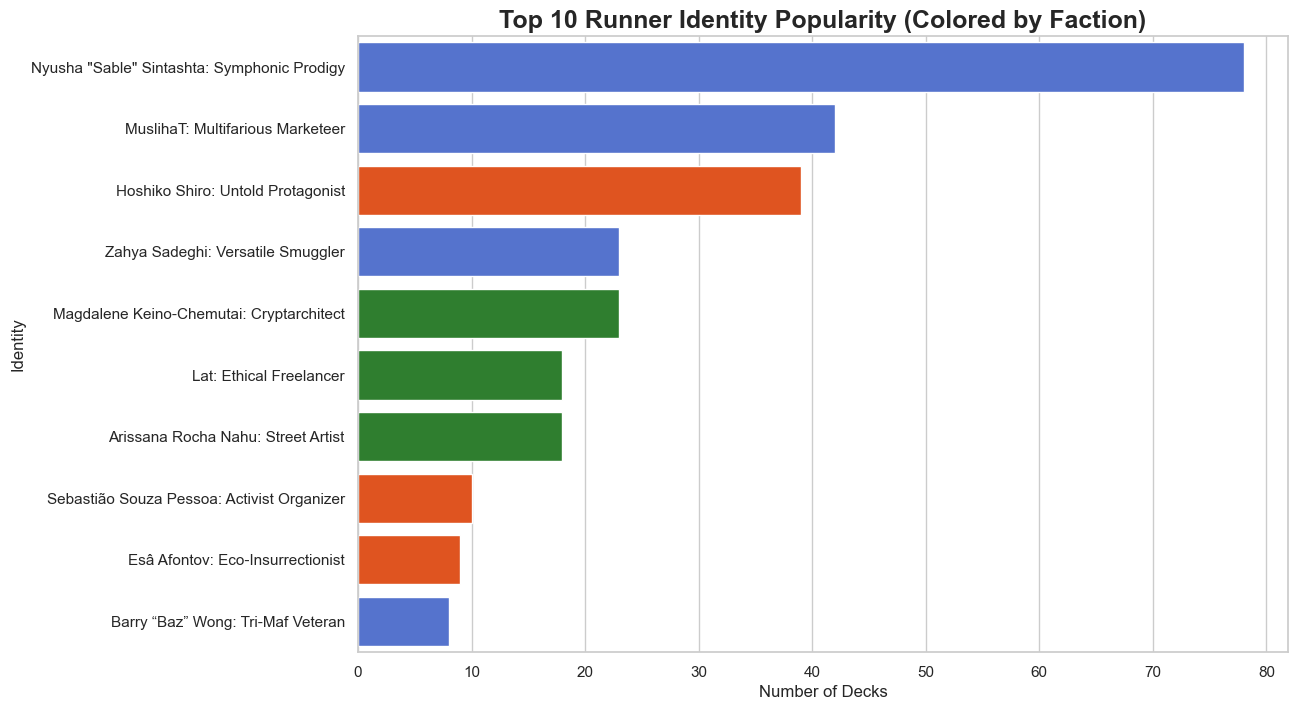

In [7]:
if not runner_df.empty:
    print("\n--- 分析2: Top 10 潜袭者身份出场率 (按阵营着色) ---")

    # --- 步骤 1: 准备绘图所需的数据 ---

    # a. 从总数据中，只筛选出身份卡 (这步不变)
    identities_df = runner_df[runner_df['type_code'] == 'identity']

    # b. 计算出Top 10的身份 (这步不变)
    top_10_identities = identities_df['title'].value_counts().head(10)

    # --- 步骤 2: 【关键修正】创建一个【唯一索引】的查找表 ---
    
    # a. 从只包含身份卡的identities_df中，选取我们需要的两列，并使用 .drop_duplicates() 去除重复行
    map_source = identities_df[['title', 'faction_code']].drop_duplicates()
    
    # b. 现在，再用这个干净的、无重复的来源来创建查找表
    identity_to_faction_map = map_source.set_index('title')['faction_code']
    
    # c. 生成颜色列表 (这行代码现在可以正常工作了)
    custom_palette_for_ids = [
        faction_colors.get(faction, '#CCCCCC')
        for faction in top_10_identities.index.map(identity_to_faction_map)
    ]

    # --- 步骤 3: 使用自定义颜色进行绘图 (这部分代码无需改动) ---
    plt.figure()
    
    identity_plot = sns.barplot(
        x=top_10_identities.values,
        y=top_10_identities.index,
        palette=custom_palette_for_ids
    )
    
    identity_plot.set_title('Top 10 Runner Identity Popularity (Colored by Faction)', fontsize=18, weight='bold')
    identity_plot.set_xlabel('Number of Decks', fontsize=12)
    identity_plot.set_ylabel('Identity', fontsize=12)

    if not os.path.exists('images'):
        os.makedirs('images')
    
    #定义文件名和路径
    image_path = 'images/runner_identity_popularity.png'
    
    #调用 savefig() 来保存
    plt.savefig(
        image_path, 
        dpi=300,               # 参数1: dpi=300, 保存为高分辨率图片，更清晰
        bbox_inches='tight'    # 参数2: bbox_inches='tight', 自动裁剪掉图片周围多余的白边
    )
    
    print(f"图表已成功保存到: {image_path}")

    
    plt.show()


--- 分析3: Top 20 公司卡牌使用率 (按阵营着色) ---


C:\Users\weifeng\AppData\Local\Temp\ipykernel_15264\2068705564.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  card_plot = sns.barplot(


图表已成功保存到: images/runner_card_popularity.png
图表生成成功！


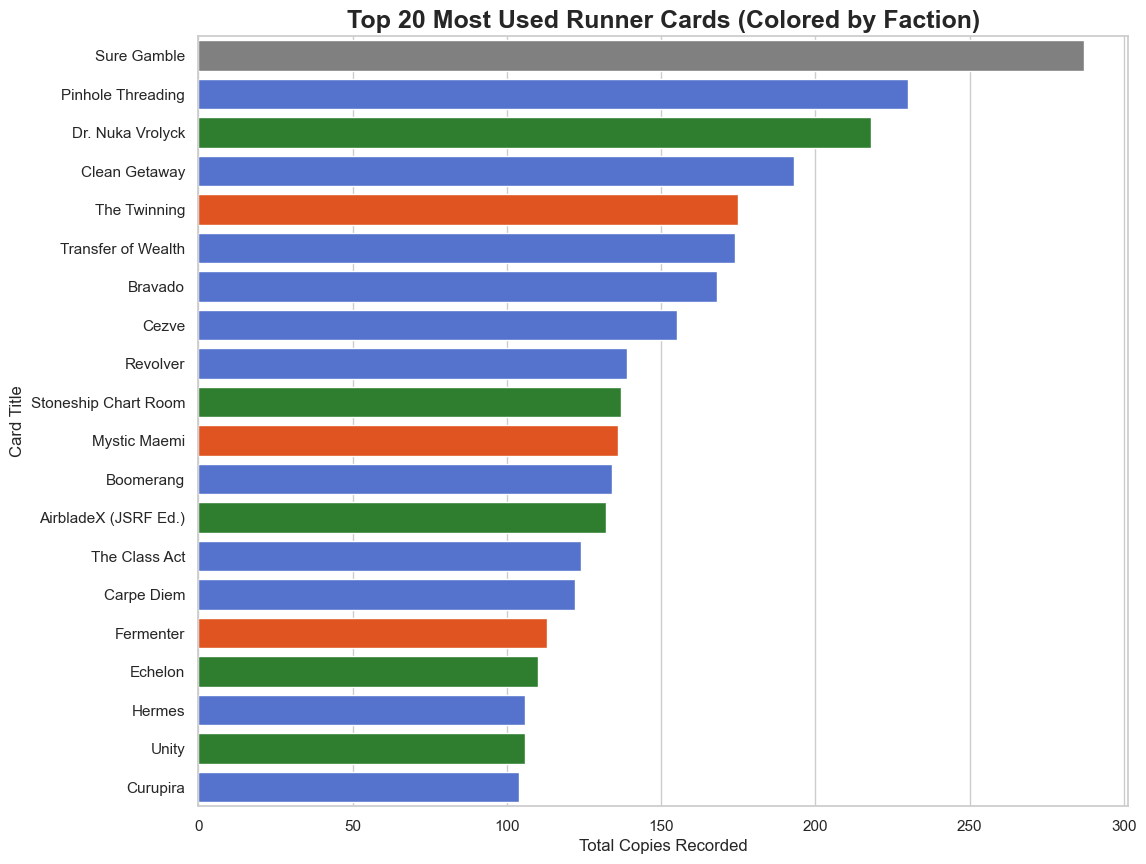

In [8]:
if not runner_df.empty:
    print("\n--- 分析3: Top 20 公司卡牌使用率 (按阵营着色) ---")



    # --- 步骤 2: 准备绘图所需的数据 ---

    # a. 计算出Top 20的卡牌 (和之前一样)
    top_20_cards = runner_df[runner_df['type_code'] != 'identity']['title'].value_counts().head(20)

    # b. 【关键】为这Top 20的卡牌，找到它们各自的阵营
    #    首先，我们创建一个从卡牌标题到阵营代码的“查找表”(mapping)
    card_to_faction_map = runner_df[['title', 'faction_code']].drop_duplicates().set_index('title')['faction_code']
    
    #    然后，我们利用这个查找表，为Top 20的卡牌标题列表，生成一个对应的【颜色列表】
    #    top_20_cards.index 就是一个包含20个卡牌标题的列表
    #    这行代码读作：对于Top 20卡牌中的每一个标题，先找到它的阵营，再根据阵营找到对应的颜色，最后把这些颜色组合成一个列表。
    custom_palette = [faction_colors.get(faction, '#CCCCCC') for faction in top_20_cards.index.map(card_to_faction_map)]


    # --- 步骤 3: 使用自定义颜色进行绘图 ---
    plt.figure(figsize=(12, 10)) # 我们可以把图调得高一点，方便看清标签
    
    card_plot = sns.barplot(
        x=top_20_cards.values,
        y=top_20_cards.index,
        palette=custom_palette  # <-- 魔法在这里！我们传入了自己生成的颜色列表
    )
    
    card_plot.set_title('Top 20 Most Used Runner Cards (Colored by Faction)', fontsize=18, weight='bold')
    card_plot.set_xlabel('Total Copies Recorded', fontsize=12)
    card_plot.set_ylabel('Card Title', fontsize=12)

    if not os.path.exists('images'):
        os.makedirs('images')
    
    #定义文件名和路径
    image_path = 'images/runner_card_popularity.png'
    
    #调用 savefig() 来保存
    plt.savefig(
        image_path, 
        dpi=300,               # 参数1: dpi=300, 保存为高分辨率图片，更清晰
        bbox_inches='tight'    # 参数2: bbox_inches='tight', 自动裁剪掉图片周围多余的白边
    )
    
    print(f"图表已成功保存到: {image_path}")

    
    print("图表生成成功！")
    plt.show()